In [31]:
#Прочитайте csv файл (використовуйте функцію read_csv)
%matplotlib inline
import pandas as pd
df = pd.read_csv('./bestsellers with categories.csv')

In [32]:
#Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [33]:
#Виведіть розміри датасету (використовуйте атрибут shape)
print('Розмір датасету:', df.shape)

Розмір датасету: (550, 7)


In [34]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [35]:
#Відповідь: 
print('Чи є в якихось змінних пропуски? (Так / ні)')
if df.isna().any().any():
    print('Так')
else:
    print('ні')

Чи є в якихось змінних пропуски? (Так / ні)
ні


In [36]:
#Відповідь: 
print('Які є унікальні жанри?')
unique_genres = df['genre'].unique()
for genre in unique_genres:
    print(genre)

Які є унікальні жанри?
Non Fiction
Fiction


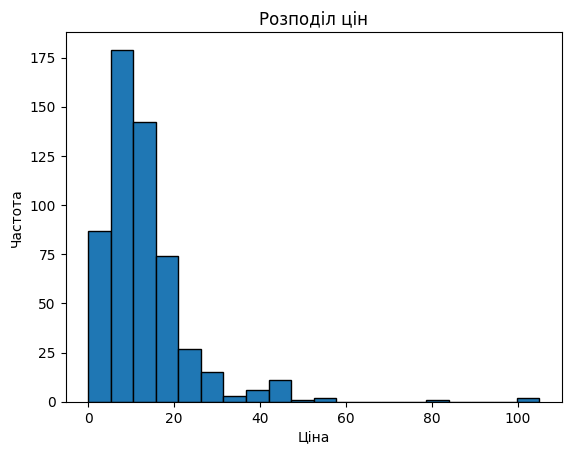

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [37]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")


In [38]:
# Який рейтинг у датасеті найвищий?
highest_rating = df['user_rating'].max()
print(f"Найвищий рейтинг у датасеті: {highest_rating}")

Найвищий рейтинг у датасеті: 4.9


In [39]:
#Скільки книг мають такий рейтинг?
count_highest_rating = (df['user_rating'] == highest_rating).sum()
print(f"Кількість книг з найвищим рейтингом: {count_highest_rating}")

Кількість книг з найвищим рейтингом: 52


In [40]:
#Яка книга має найбільше відгуків?
book_with_most_reviews = df[df['reviews'] == df['reviews'].max()]
print(f"Книга з найбільшою кількістю відгуків: {book_with_most_reviews.iloc[0]['name']}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [41]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
top_50_2015 = df[(df['year'] == 2015)].sort_values('price', ascending=False).nlargest(50, 'user_rating').reset_index()
most_expensive_book_in_2015_top_50 = top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]
print(f"Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році:")
print(most_expensive_book_in_2015_top_50.iloc[0]['name'])

Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році:
Publication Manual of the American Psychological Association, 6th Edition


In [42]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
count_fiction_books_in_2010_top_50 = len(df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].nlargest(50, 'user_rating'))
print(f"Кількість книг жанру Fiction у Топ-50 за рейтингом у 2010 році: {count_fiction_books_in_2010_top_50}")

Кількість книг жанру Fiction у Топ-50 за рейтингом у 2010 році: 20


In [43]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
count_books_with_rating_4_9_in_2010_2011 = len(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))])
print(f"Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: {count_books_with_rating_4_9_in_2010_2011}")

Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1


In [44]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році 
#і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
sorted_books_2015_under_8_dollars = top_50_2015[top_50_2015['price'] < 8].sort_values(by='price')

print("Всі книги, які потрапили до рейтингу в 2015 році та коштують менше за 8 доларів (відсортовані за зростанням ціни):")
print(sorted_books_2015_under_8_dollars)


Всі книги, які потрапили до рейтингу в 2015 році та коштують менше за 8 доларів (відсортовані за зростанням ціни):
    index                                               name  \
10    507                              To Kill a Mockingbird   
16    123                               Giraffes Can't Dance   
17     54  Creative Haven Creative Cats Coloring Book (Ad...   
43    206                         Knock-Knock Jokes for Kids   
20    111                                    First 100 Words   
31    210                      Laugh-Out-Loud Jokes for Kids   
0     478                        The Very Hungry Caterpillar   
13     63                     Dear Zoo: A Lift-the-Flap Book   
14     55  Creative Haven Owls Coloring Book (Adult Color...   
15    224                                   Love You Forever   
33     28                       Baby Touch and Feel: Animals   
34     89  Dover Creative Haven Art Nouveau Animal Design...   
35    201  Killing Reagan: The Violent Assault That C

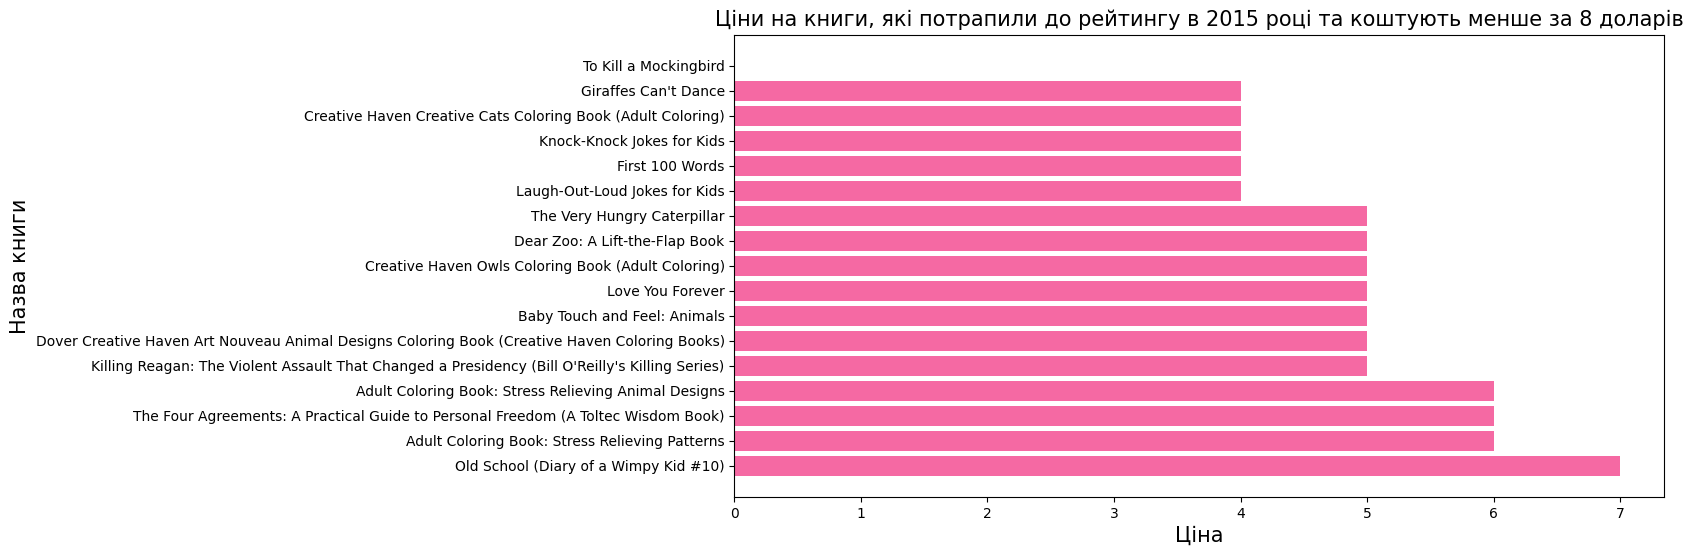

In [80]:
book_titles = sorted_books_2015_under_8_dollars['name']
book_prices = sorted_books_2015_under_8_dollars['price']

plt.figure(figsize=(12, 6))
plt.barh(book_titles, book_prices, color='#f569a3')

plt.xlabel('Ціна', fontsize=15)
plt.ylabel('Назва книги', fontsize=15)
plt.title('Ціни на книги, які потрапили до рейтингу в 2015 році та коштують менше за 8 доларів', fontsize=15)
plt.gca().invert_yaxis()
plt.show()

In [45]:
# Яка книга остання у відсортованому списку?
last_book_in_sorted_list = sorted_books_2015_under_8_dollars.iloc[-1]['name']
print(f"Остання книга у відсортованому списку: {last_book_in_sorted_list}")

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [46]:
#Максимальна ціна для жанру Fiction
genre_max_prices = df.groupby('genre')['price'].max()
fiction_max_price = genre_max_prices['Fiction']
print(f"Максимальна ціна для жанру Fiction: {fiction_max_price}")

Максимальна ціна для жанру Fiction: 82


In [47]:
#Мінімальна ціна для жанру Fiction
genre_min_prices = df.groupby('genre')['price'].min()
fiction_min_price = genre_min_prices['Fiction']
print(f"Мінімальна ціна для жанру Fiction: {fiction_min_price}")

Мінімальна ціна для жанру Fiction: 0


In [48]:
#Максимальна ціна для жанру Non Fiction
non_fiction_max_price = genre_max_prices['Non Fiction']
print(f"Максимальна ціна для жанру Non Fiction: {non_fiction_max_price}")

Максимальна ціна для жанру Non Fiction: 105


In [49]:
#Мінімальна ціна для жанру Non Fiction
non_fiction_min_price = genre_min_prices['Non Fiction']
print(f"Мінімальна ціна для жанру Non Fiction: {non_fiction_min_price}")

Мінімальна ціна для жанру Non Fiction: 0


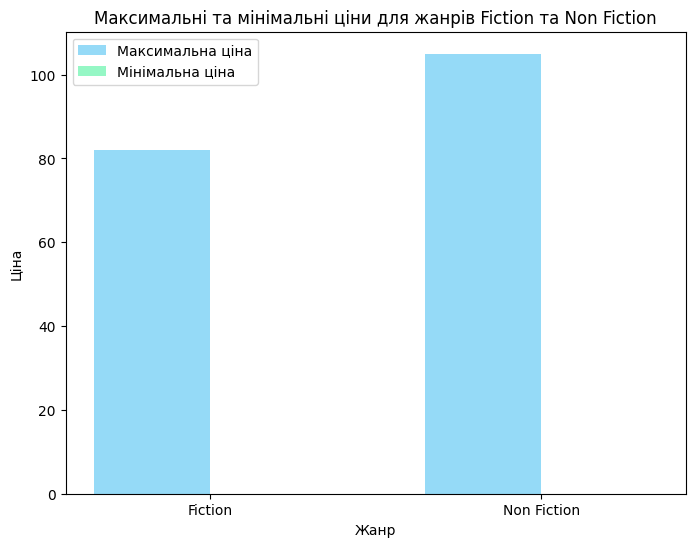

In [82]:
genres = ['Fiction', 'Non Fiction']
max_prices = [fiction_max_price, non_fiction_max_price]
min_prices = [fiction_min_price, non_fiction_min_price]

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(genres))
bar1 = plt.bar(index, max_prices, bar_width, label='Максимальна ціна', color='#69cbf5', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], min_prices, bar_width, label='Мінімальна ціна', color='#69f5ad', alpha=0.7)

plt.xlabel('Жанр')
plt.ylabel('Ціна')
plt.title('Максимальні та мінімальні ціни для жанрів Fiction та Non Fiction')
plt.xticks([i + bar_width / 2 for i in index], genres)
plt.legend()
plt.show()

In [50]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
#Не беріть усі стовпці, виберете тільки потрібні
author_book_counts = df.groupby('author')['name'].count().reset_index()
author_book_counts.columns = ['author', 'book_count']
print(author_book_counts)

                         author  book_count
0              Abraham Verghese           2
1                Adam Gasiewski           1
2                 Adam Mansbach           1
3                     Adir Levy           1
4    Admiral William H. McRaven           1
..                          ...         ...
243             Walter Isaacson           3
244               William Davis           2
245            William P. Young           2
246            Wizards RPG Team           3
247                Zhi Gang Sha           2

[248 rows x 2 columns]


In [51]:
#  Якої розмірності вийшла таблиця?
print(f"Розмірність таблиці: {author_book_counts.shape}")

Розмірність таблиці: (248, 2)


In [52]:
# Який автор має найбільше книг?
most_prolific_author = author_book_counts[author_book_counts['book_count'] == author_book_counts['book_count'].max()]
print(f"Автор з найбільшою кількістю книг:")
print(most_prolific_author.iloc[0]['author'])

Автор з найбільшою кількістю книг:
Jeff Kinney


In [53]:
# Скільки книг цього автора?
print(f"Кількість книг цього автора: {most_prolific_author.iloc[0]['book_count']}")

Кількість книг цього автора: 12


In [54]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
#(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). 
#Не беріть усі стовпці, виберете тільки потрібні
author_average_ratings = df.groupby('author')['user_rating'].mean().reset_index()
author_average_ratings.columns = ['name', 'average_rating']
print(author_average_ratings)

                           name  average_rating
0              Abraham Verghese        4.600000
1                Adam Gasiewski        4.400000
2                 Adam Mansbach        4.800000
3                     Adir Levy        4.800000
4    Admiral William H. McRaven        4.700000
..                          ...             ...
243             Walter Isaacson        4.566667
244               William Davis        4.400000
245            William P. Young        4.600000
246            Wizards RPG Team        4.800000
247                Zhi Gang Sha        4.600000

[248 rows x 2 columns]


In [55]:
# У якого автора середній рейтинг мінімальний? 
author_with_min_average_rating = author_average_ratings[author_average_ratings.average_rating == author_average_ratings['average_rating'].min()]
print(f"Автор з найменшим середнім рейтингом:")
print(author_with_min_average_rating.iloc[0]['name'])

Автор з найменшим середнім рейтингом:
Donna Tartt


In [56]:
#Який у цього автора середній рейтинг?
print(f"Середній рейтинг цього автора: {author_with_min_average_rating.iloc[0]['average_rating']}")

Середній рейтинг цього автора: 3.9


In [57]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
merged_df = pd.concat([author_book_counts, author_average_ratings], axis=1)
merged_df.drop(columns=['name'], inplace=True)
merged_df.head()

,author,book_count,average_rating
0,Abraham Verghese,2,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7


In [58]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
sorted_df = merged_df.sort_values(by=['book_count', 'average_rating'], ascending=[True, True])
print(sorted_df)

                                 author  book_count  average_rating
171                      Muriel Barbery           1        4.000000
43                         Chris Cleave           1        4.100000
109                   Ian K. Smith M.D.           1        4.100000
186                        Pierre Dukan           1        4.100000
81                     Elizabeth Strout           1        4.200000
..                                  ...         ...             ...
11   American Psychological Association          10        4.500000
226                     Suzanne Collins          11        4.663636
92                         Gary Chapman          11        4.736364
197                        Rick Riordan          11        4.772727
120                         Jeff Kinney          12        4.800000

[248 rows x 3 columns]


C:\Users\taras\AppData\Local\Temp\ipykernel_15132\3805344898.py:14: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layout()
C:\Users\taras\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


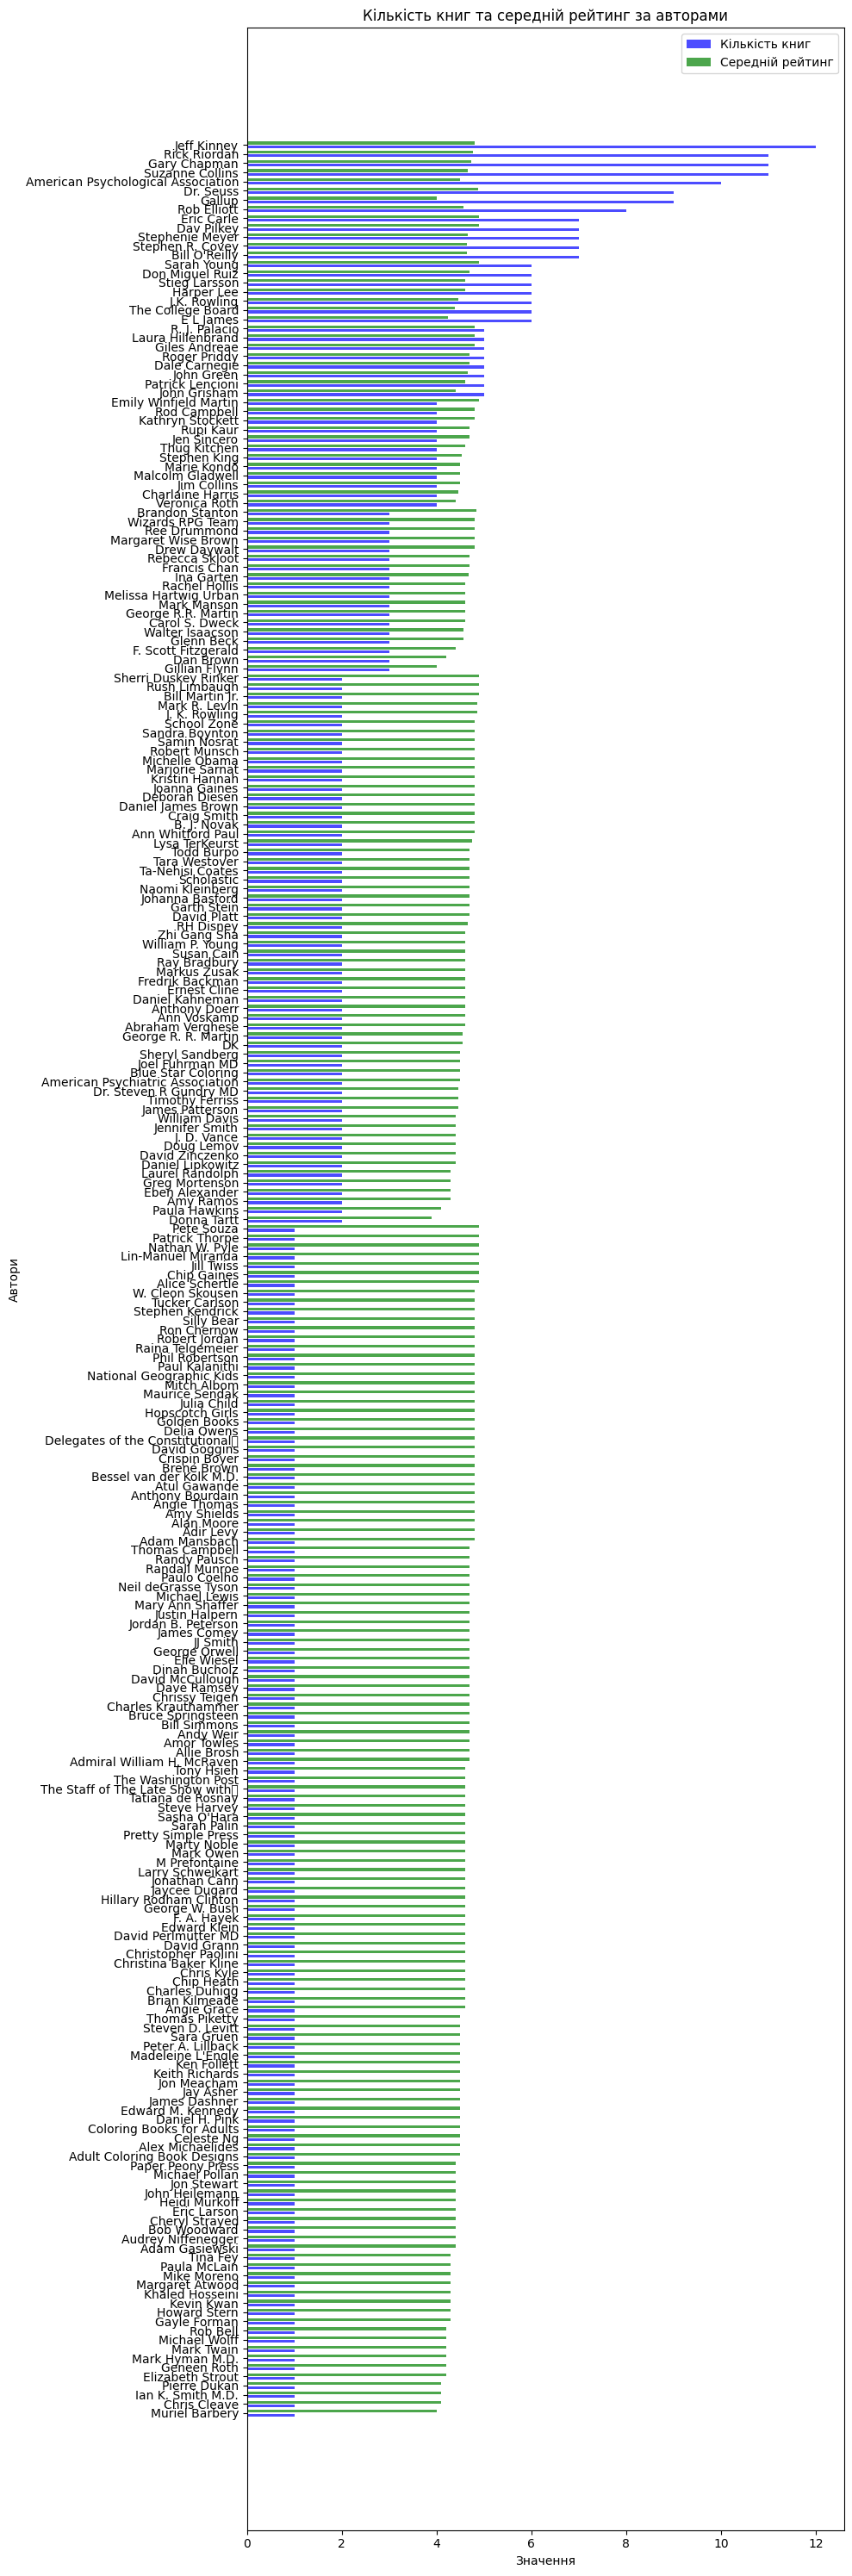

In [93]:
fig, ax = plt.subplots(figsize=(10, 30))

index = range(len(sorted_df))

plt.barh(index, sorted_df['book_count'], height=0.3, label='Кількість книг', color='b', alpha=0.7)
plt.barh([i + 0.4 for i in index], sorted_df['average_rating'], height=0.3, label='Середній рейтинг', color='g', alpha=0.7)

plt.ylabel('Автори')
plt.xlabel('Значення')
plt.title('Кількість книг та середній рейтинг за авторами')
plt.yticks([i + 0.2 for i in index], sorted_df['author'])
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
#Який автор перший у списку?
sorted_df.head(1)

,author,book_count,average_rating
171,Muriel Barbery,1,4.0
